In [ ]:
# This is a Python 3 environment

# Base level imports for data science work
import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path
from json import decoder
import glob, os, json
import re

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#cd /content/drive/MyDrive/BA/0.4/Sources/

# Start der Datenverarbeitung

In [ ]:
#Herunterladen des Data Frame
df = pd.read_csv("https://chruezfalsch.ch/df_ba.csv")
del df['Unnamed: 0'] 

In [ ]:
df.sample(10)

,source,fake,text
53410,Telegram,1,⚡️🇦🇹 Österreich dreht auf! \n\n✅ Erst der Lock...
6857,Telegram,1,Ist ja schon lang bekannt 🙄
60461,Telegram,1,Durch die Straßen der Bundeshauptstadt schallt...
29680,Telegram,1,"Hallo Mara, \ngerne posten: Zur Meldung, dass ..."
17405,Telegram,1,"Super, das macht anderen Mut ihre auch wegzupa..."
15462,Telegram,1,https://www.declaration-juristes.ch/d/aufruf/?...
22538,Telegram,1,https://twitter.com/burkhardtphilip/status/143...
50686,Telegram,1,‼️ZWANGSIMPFUNG IN DEUTSCHLAND SOLL WOHL AB AP...
50270,Telegram,1,🕯💫 Wir gehen spazieren....\n …wer kommt mit? 🌟...
16640,Telegram,1,xxxhttps://youtu.be/Uk__GG9LXjs\n\n#shedding\n...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


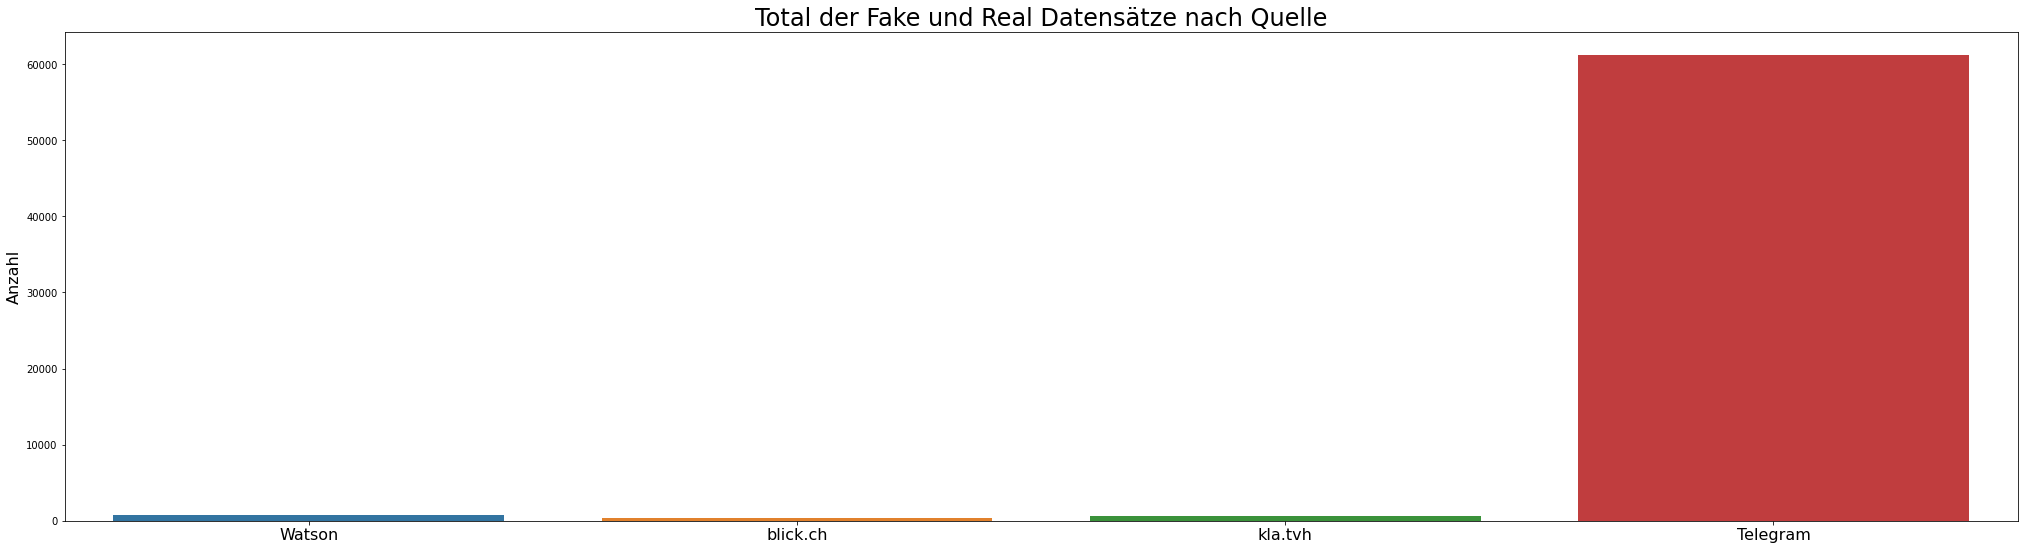

In [ ]:
#UNBERENIGTE DATEN
#Ploten der Verteilung der Datensätze nach Quellen
plt.figure(figsize=(35,9))

sns.countplot(df.source)
plt.title('Total der Fake und Real Datensätze nach Quelle', fontsize=24)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)

plt.show()

In [ ]:
#Berechnung der länge der einzelnen Datensätze
df['text'] = df['text'].astype(str)
df['len'] = df['text'].str.split().map(lambda x: len(x))

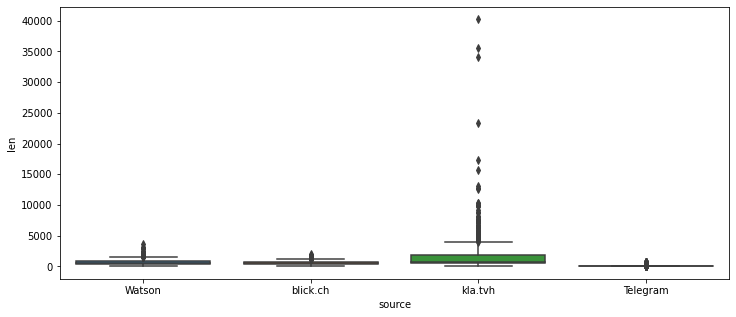

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='source', y='len', data=df)
plt.show()

In [ ]:
df = df[df['text'].str.split().str.len().gt(400)]
df = df[df['text'].str.split().str.len().lt(3500)]

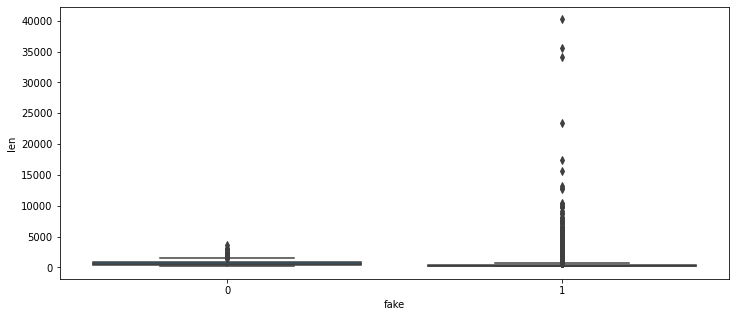

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='fake', y='len', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


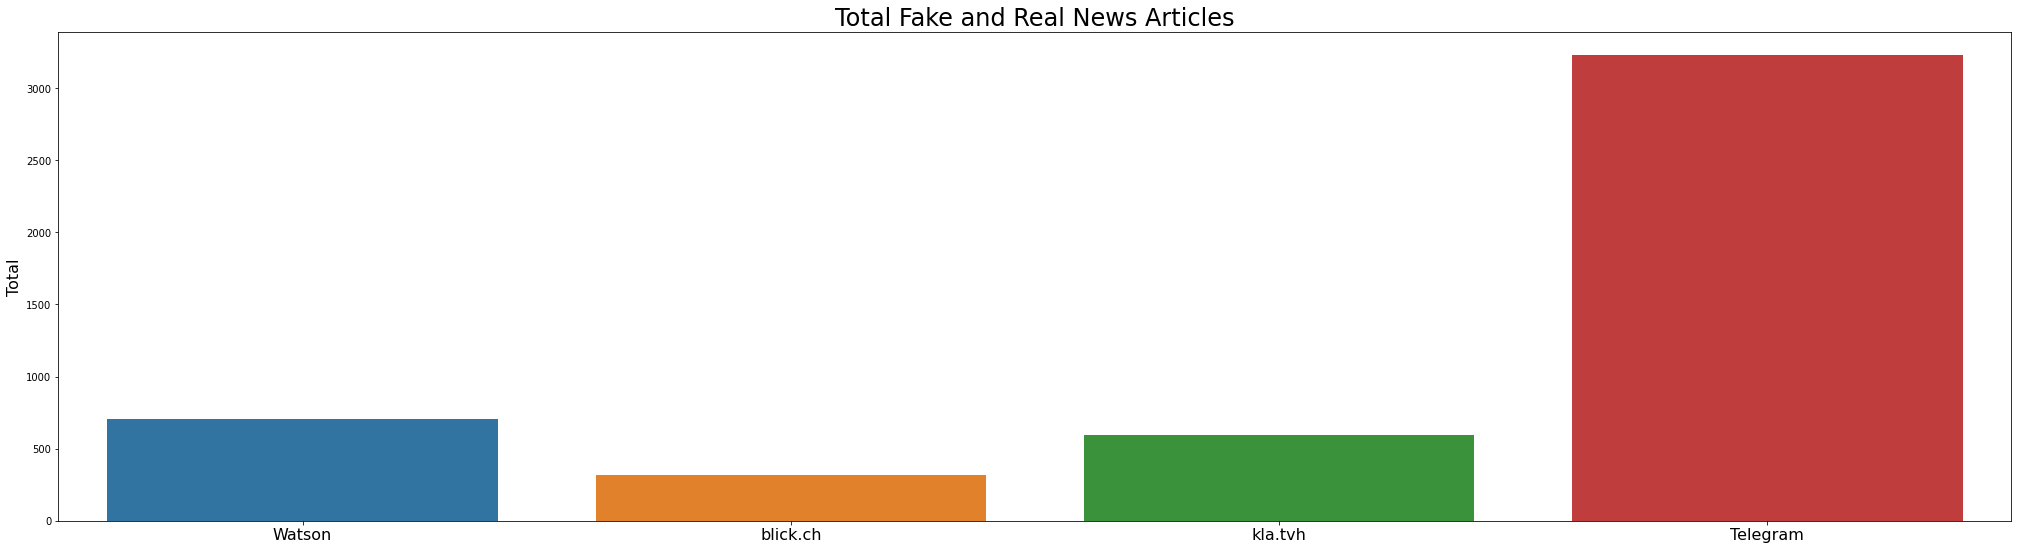

In [ ]:
plt.figure(figsize=(35,9))

sns.countplot(df.source)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


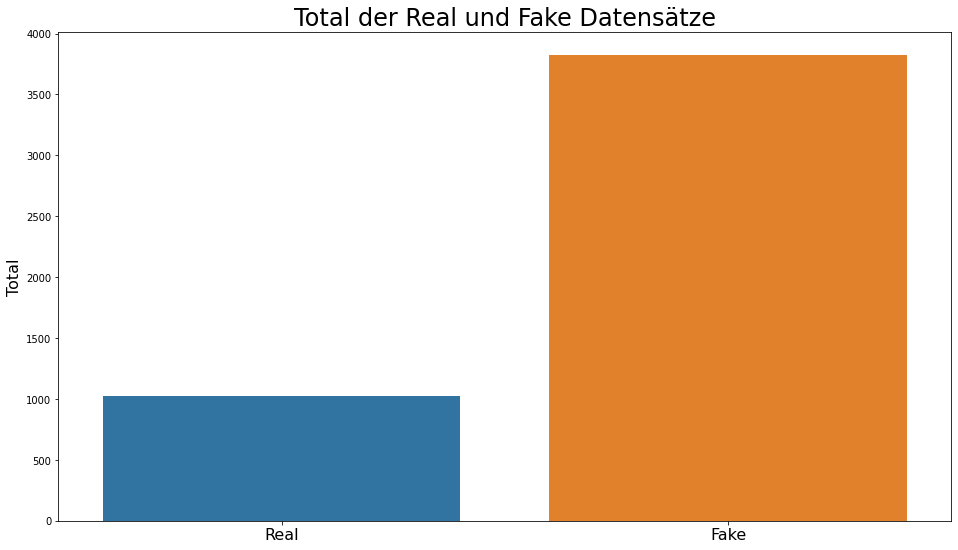

In [ ]:
#Aufteilung Fake und Real News
plt.figure(figsize=(16,9))

sns.countplot(df.fake)
plt.title('Total der Real und Fake Datensätze', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0,1], ['Real','Fake'], fontsize=16)
plt.xticks(fontsize=16)

plt.show()

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
stop = set(stopwords.words('german'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def removeurls(text):
  return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
def removeklatv(text):
  return re.sub("(?i)kla.tv:","Quelle", text)
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
def wordstem(text):
    stemmer = SnowballStemmer("german")
    final_text = []
    for i in text.split():
      word=""
      for z in i:
        if z.isalpha():
          word=word+z
        else:
          if word !="":
            stemed=stemmer.stem(word)
            if stemed == "":
                stemed=word
            final_text.append(stemed)
            #print(word, "/", stemed)
          word=""
          final_text.append(z)
          #final_text.append(stemmer.stem(i.strip()))
        final_text.append(" ")
    return "".join(final_text)
# Final function to clean the text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    #text = wordstem(text)
    return text

In [ ]:
#Quellen Entfernen
df['text']=df['text'].replace("kla.tv", "Quelle")
df['text']=df['text'].replace("KLA.TV", "Quelle")
df['text']=df['text'].replace("KLA.TV:", "Quelle")
df['text']=df['text'].replace("Kla.TV:", "Quelle")
df['text']=df['text'].replace("Kla.TV", "Quelle")
df['text']=df['text'].replace("blick.ch", "Quelle")
df['text']=df['text'].replace("watson.ch", "Quelle")
df['text']=df['text'].replace("watson", "Quelle")
df['text']=df['text'].replace("Zeit Online", "Quelle")
df['text']=df['text'].replace("Zeit online", "Quelle")
df['text']=df['text'].replace("zeit online", "Quelle")
df['text']=df['text'].replace("(...)", "")
df['text']=df['text'].replace("...", ".")
df['text']=df['text'].replace("!!!", "!")
df['text']=df['text'].replace("???", "?")
df['text']=df['text'].replace("ß", "ss")

In [ ]:
df['text']=df['text'].apply(removeurls)
df['text']=df['text'].apply(removeklatv)
df['text']=df['text'].apply(remove_emojis)
df['text']=df['text'].apply(clean_text)

In [ ]:
df_faketext=df[df.fake == 1]
df_realtext=df[df.fake == 0]

faketext=df[df.fake == 1].text
realtext=df[df.fake == 0].text
#########
indnex_realtext=df_realtext.index
indnex_faketext=df_faketext.index

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
X = vectorizer.fit_transform(faketext)
arr = X.toarray()
cosinsimilarity_fake=cosine_similarity(arr)

In [ ]:
i=0
b=0
remover=[]

for bla in  cosinsimilarity_fake:
    b=0
    if indnex_faketext[i] not in remover:
      for ba in bla:
        if b!=i:
          if ba>0.5:
            if indnex_faketext[b] not in remover:
              remover.append(indnex_faketext[b])
        b=b+1
    i=i+1
for dd in remover:
  df_faketext=df_faketext.drop(dd)

print(len(remover), "Werte wurden entfernt.", "es wurden foglende Werte entfernt")

diff_df = df_faketext

In [ ]:
#cosin simularity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(realtext)
arr = X.toarray()
cosinsimilarity_real=cosine_similarity(arr)

In [ ]:
i=0
b=0
dd=0
del remover[:]
remover=[]

for bla in  cosinsimilarity_real:
    b=0
    if indnex_realtext[i] not in remover:
      for ba in bla:
        if b!=i:
          if ba>0.5:
            if indnex_realtext[b] not in remover:
              remover.append(indnex_realtext[b])
        b=b+1
    i=i+1
for dd in remover:
  df_realtext=df_realtext.drop(dd)

print(len(remover), "Werte wurden entfernt")
diff_df = diff_df.append(df_realtext)

In [ ]:
#Aufteilung Fake und Real News
plt.figure(figsize=(16,9))

sns.countplot(df.fake)
plt.title('Total der Real und Fake Datensätze', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0,1], ['Real','Fake'], fontsize=16)
plt.xticks(fontsize=16)

plt.show()

In [ ]:
df.sample(10)

,source,fake,text,len
404,Watson,0,Kantone Bewältigung steigenden Anzahl Hospital...,443
17319,Telegram,1,TEILEN ‼‼‼‼‼ Geschätzte Patrioten Freier Wille...,486
593,Watson,0,Kanton Freiburg gehört europaweit schlimmsten ...,992
379,Watson,0,1169 Neuinfektionen gestern. Zahl seit Woche k...,672
1120,kla.tvh,1,Österreichs Impfpflicht-Kommission – Wer „Expe...,863
12951,Telegram,1,"Mike Yeadon, ehemaliger Chefwissenschaftler Pf...",519
4956,Telegram,1,Holländische Anwälte drohen Österreich Suspend...,191
18588,Telegram,1,glaubt wirklich hilft? endlich lassen? weiss w...,501
38840,Telegram,1,BAG erfasst Zahl Impfdurchbrüche mehr ganze La...,188
420,Watson,0,Spital Bülach Zürcher Unterland verzeichnete l...,379


Model